# Лабораторная работа №6. Оценка и улучшение качества модели

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

### 2. Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

weights:

    Определяет, как взвешиваются голоса ближайших соседей.
        'uniform': Все соседи имеют одинаковый вес.
        'distance': Вес соседа обратно пропорционален расстоянию до него, то есть ближние соседи оказывают большее влияние.

metric:

    Метрика, используемая для измерения расстояния между точками.
        'euclidean': Евклидово расстояние (корень из суммы квадратов разностей координат).
        'manhattan': Манхэттенское расстояние (сумма модулей разностей координат).
        'minkowski': Расстояние Минковского, обобщающее предыдущие метрики. Оно позволяет использовать параметр p, который неявно равен 2 (евклидовое расстояние) или 1 (манхэттенское).

Лучшие параметры модели: {'n_neighbors': 3, 'weights': 2, 'metric': 1}Лучшая точность (GridSearchCV): 0.986
Точность на тестовом наборе: 0.987
Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



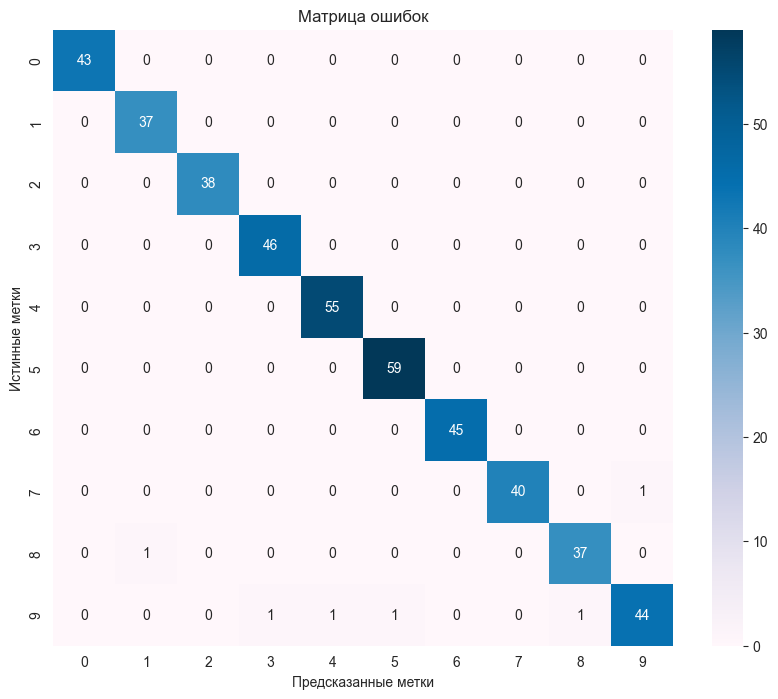

Качество модели KNeighborsClassifier на наборе данных digits (перекрестная проверка):
Средняя точность: 0.966
Отклонение: 0.011
Точности по каждой итерации: [0.95555556 0.95833333 0.96935933 0.98607242 0.96100279]


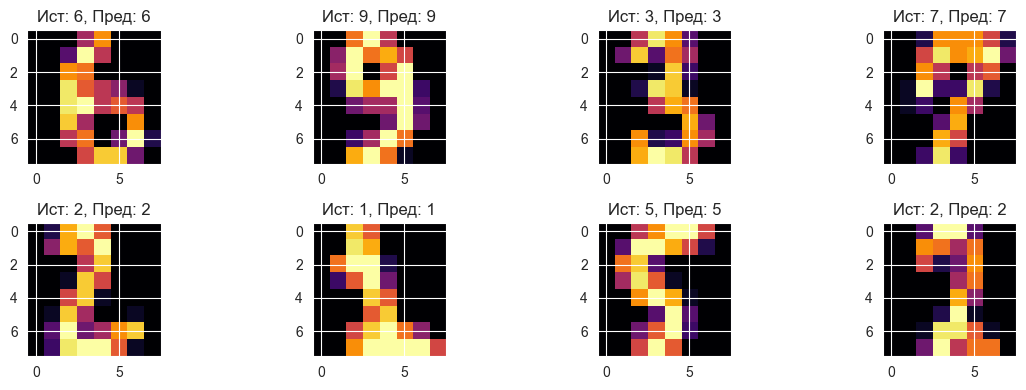

In [6]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_clf = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
# из параметров в числа
best_params_formatted = {
    'n_neighbors': best_params['n_neighbors'],
    'weights': 1 if best_params['weights'] == 'uniform' else 2,  # категорию в число
    'metric': 1 if best_params['metric'] == 'euclidean' else 
              2 if best_params['metric'] == 'manhattan' else 3  # категорию в число
}
print(f"Лучшие параметры модели: {best_params_formatted}"+
      f"Лучшая точность (GridSearchCV): {grid_search.best_score_:.3f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Точность на тестовом наборе: {accuracy_score(y_test, y_pred):.3f}")

print("Отчет классификации:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.show()

scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Качество модели KNeighborsClassifier на наборе данных digits (перекрестная проверка):")
print(f"Средняя точность: {scores.mean():.3f}" +
      f"\nОтклонение: {scores.std():.3f}"+
      f"\nТочности по каждой итерации: {scores}")
plt.figure(figsize=(12, 4))
for index, (image, label, pred) in enumerate(zip(X_test[:8], y_test[:8], y_pred[:8])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image.reshape(8, 8), cmap='inferno')
    plt.title(f"Ист: {label}, Пред: {pred}")
    #plt.axis('off')
plt.tight_layout()
plt.show()


### 3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск
* Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint)
<ul>
<li>Salary – установить числовой тип (например 50000),</li>
<li>city – город проживания (например, Bishkek),</li>
<li>age – возраст (например, от 30 до 65),</li> 
<li>vacation_prefer – тип отдыха (например, Shopping или Beach holiday),</li> 
<li>transport_prefer – тип транспорта (например, auto, plane),</li> 
<li>target – город, в котором проведем отпуск (например, London, Moscow)</li>
</ul>
* Преобразовать категориальные данные в числовые, используя panadas.get_dummies.
* Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)
* Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)
* Проверить оценку модели.
* Сделать предсказание на случайных данных.
* Улучшить модель согласно примерам лекций 9-10 и материала лабораторной работы


#### Этап 1. Создание и обучение модели

   salary      city  age vacation_prefer transport_prefer    target
0   54891   Bishkek   60        Shopping             auto    London
1   60941    London   23        Cultural             auto     Tokyo
2   99912  New York   56        Shopping              bus     Paris
3   76386  New York   55      Relaxation            plane  New York
4   33791    Moscow   47        Shopping            train     Paris
Encoded dataframe
   salary  age  city_Bishkek  city_London  city_Moscow  city_New York  \
0   54891   60          True        False        False          False   
1   60941   23         False         True        False          False   
2   99912   56         False        False        False           True   
3   76386   55         False        False        False           True   
4   33791   47         False        False         True          False   

   vacation_prefer_Beach holiday  vacation_prefer_Cultural  \
0                          False                     False   
1          

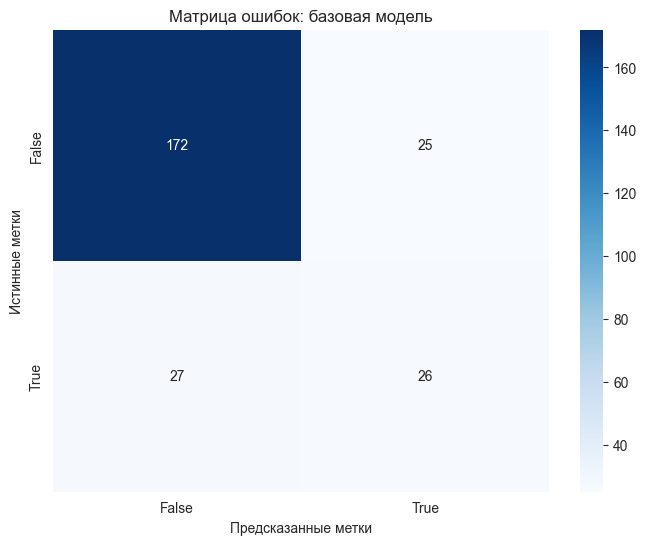

[[172  25]
 [ 27  26]]


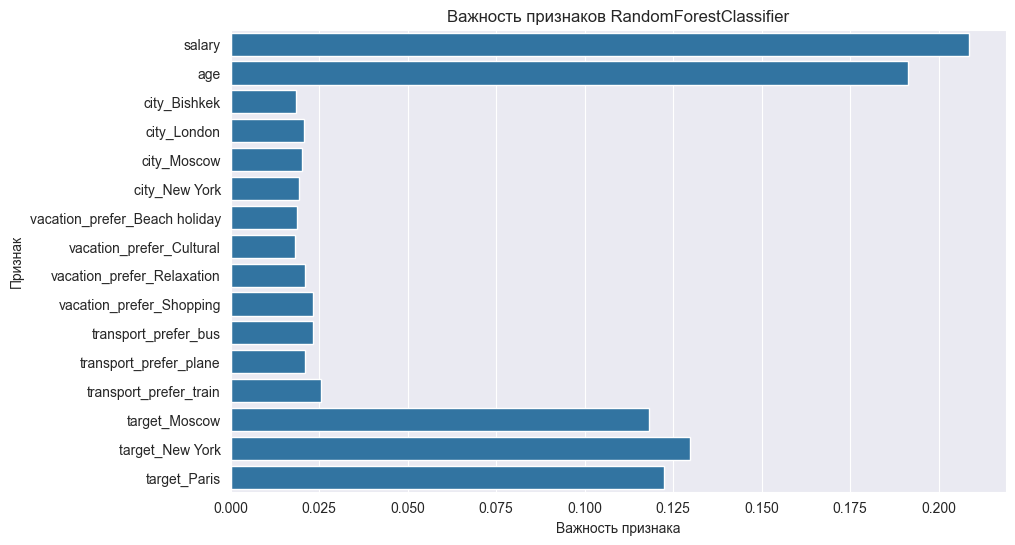

In [14]:
df = pd.read_csv('vacation_preferences.csv')
print(df.head())
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. из категориальных данных в числовые
# drop_first=True искл первый столбец каждой категории во избежание проблемы мультиколлинеарности
df_encoded = pd.get_dummies(df, drop_first=True)
print(f"Encoded dataframe\n{df_encoded.head()}")

# 3. обучающая и тестовая выборки
X = df_encoded.drop('target_Tokyo', axis=1)  # цп кодируется как 'target_Paris', 'target_London' и т.д.
y = df_encoded['target_Tokyo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. обучение модели
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. оценка модели
y_pred = clf.predict(X_test)
print(f"Точность модели: {accuracy_score(y_test, y_pred):.3f}")
print("Отчет классификации:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Матрица ошибок: базовая модель")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.show()
print(conf_matrix)

feature_importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Важность признаков RandomForestClassifier")
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

#### Этап 2. Улучшение модели с помощью GridSearchCV

Лучшие параметры модели: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Точность модели с оптимизированными параметрами: 0.740
Отчет классификации для лучшей модели:
              precision    recall  f1-score   support

       False       0.83      0.85      0.84       197
        True       0.38      0.34      0.36        53

    accuracy                           0.74       250
   macro avg       0.60      0.59      0.60       250
weighted avg       0.73      0.74      0.74       250

Предсказание на случайных данных: [ True]


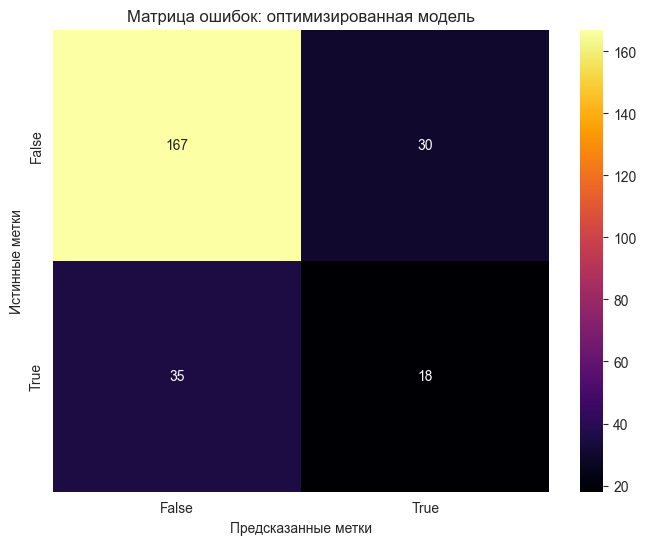

Средняя точность по стратифицированной кросс-валидации (оптимизированная модель): 0.799


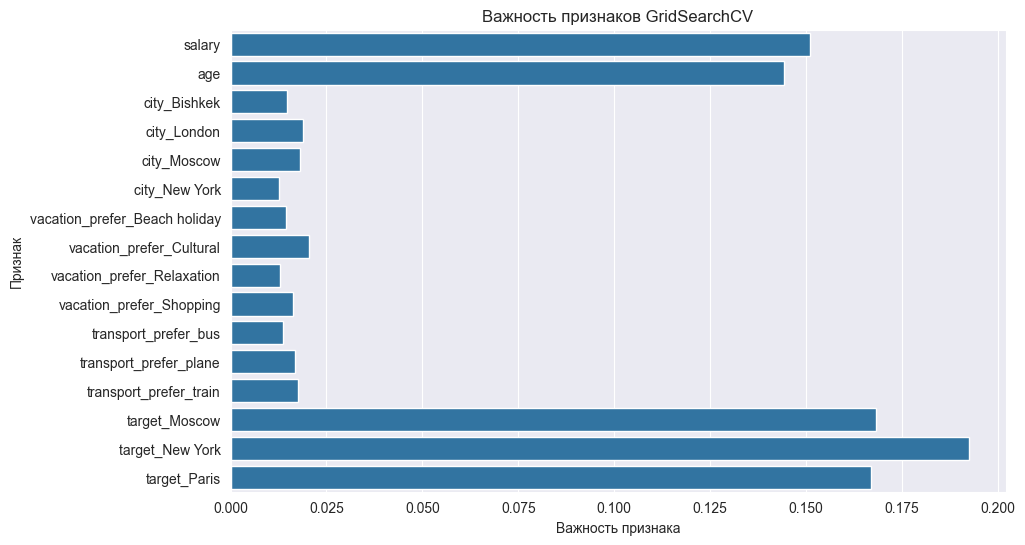

In [16]:
# 6. апгрейд модели с помощью GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры модели: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Точность модели с оптимизированными параметрами: {accuracy_score(y_test, y_pred_best):.3f}")
print("Отчет классификации для лучшей модели:")
print(classification_report(y_test, y_pred_best))

# 7. предсказания на случайных данных
sample_data = pd.DataFrame([[50000, 1, 30, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]], columns=X.columns)
sample_pred = best_model.predict(sample_data)
print(f"Предсказание на случайных данных: {sample_pred}")

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='inferno', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Матрица ошибок: оптимизированная модель")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.show()

stratified_scores_best = cross_val_score(best_model, X, y, scoring='accuracy')
print(f"Средняя точность по стратифицированной кросс-валидации (оптимизированная модель): {stratified_scores_best.mean():.3f}")

# Важность признаков
feature_importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Важность признаков GridSearchCV")
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()